In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/CAR DETAILS FROM CAR DEKHO.csv', sep=',')

In [ ]:
X=dataset.iloc[:,0:6].values
y=dataset.iloc[:,7].values

In [ ]:
y

array(['First Owner', 'First Owner', 'First Owner', ..., 'Second Owner',
       'First Owner', 'First Owner'], dtype=object)

In [ ]:
dataset


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
y

array([['First Owner'],
       ['First Owner'],
       ['First Owner'],
       ...,
       ['Second Owner'],
       ['First Owner'],
       ['First Owner']], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=le.fit_transform(X)
y=le.fit_transform(y)


ValueError: ignored

In [ ]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
X

array([[775, 2007, 60000, 70000, 'Petrol', 'Individual'],
       [1041, 2007, 135000, 50000, 'Petrol', 'Individual'],
       [505, 2012, 600000, 100000, 'Diesel', 'Individual'],
       ...,
       [777, 2009, 110000, 83000, 'Petrol', 'Individual'],
       [381, 2016, 865000, 90000, 'Diesel', 'Individual'],
       [1154, 2016, 225000, 40000, 'Petrol', 'Individual']], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()

y= sc.fit_transform(y)


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt

In [ ]:
model = Sequential()
model.add(Dense(12,input_dim=6, activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))
#compile the keras model
model.compile(loss='MSE', optimizer='adam', metrics=['RMSE'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 12)                84        
                                                                 
 dense_42 (Dense)            (None, 7)                 91        
                                                                 
 dense_43 (Dense)            (None, 3)                 24        
                                                                 
 dense_44 (Dense)            (None, 1)                 4         
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
History = model.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100


TypeError: ignored

In [ ]:
MSE=History.history['MAE']
loss=History.history['loss']

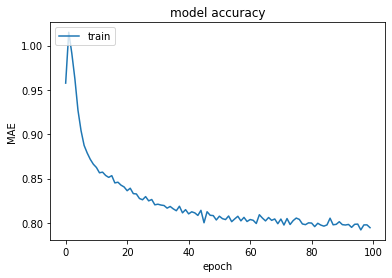

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for Training and Validation accuracy
from matplotlib import pyplot as plt
plt.plot(History.history ['MAE'])
plt.title('model accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

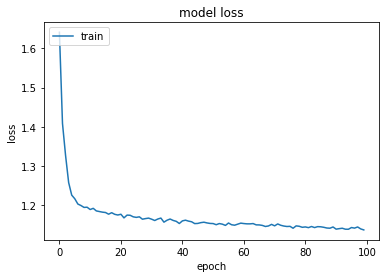

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for training loss
plt.plot(History.history ['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')